# Feature Enginnering e plotagem de gráficos

In [3]:
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format

import numpy as np

import plotly.express as px

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#

In [4]:
def load_data():
    path = '..\data\snis_datasus_2019.csv'    
    return pd.read_csv(path, decimal = ',')

#

# Correção dos tipos de dados

In [5]:
def data_correction( data ):
    try:
        data.replace('', np.nan, inplace=True)
        data.replace('-', np.nan, inplace=True)
        data['POP_TOT - População total do município (Fonte: IBGE):'] = data['POP_TOT - População total do município (Fonte: IBGE):'].astype(int)
        data['AG001 - População total atendida com abastecimento de água'] = data['AG001 - População total atendida com abastecimento de água'].astype(float)
        data['IN006_AE - Tarifa média de esgoto'] = data['IN006_AE - Tarifa média de esgoto'].astype(float)
        data['IN022_AE - Consumo médio percapita de água'] = data['IN022_AE - Consumo médio percapita de água'].astype(float)
        data['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água'] = data['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água'].astype(float)
        data['IN051_AE - Índice de perdas por ligação'] = data['IN051_AE - Índice de perdas por ligação'].astype(float)
        data['IN052_AE - Índice de consumo de água'] = data['IN052_AE - Índice de consumo de água'].astype(float)
        data['AG026 - População urbana atendida com abastecimento de água'] = data['AG026 - População urbana atendida com abastecimento de água'].astype(float)
      
        return data
    except Exception as e:
        print(e)

#

In [6]:
def test_data( data ):
    if (len(data['codigo_municipio_sem_digito'].unique()) != len(data)) == False:
        print("Não existem!")
    else:
        print("Sim, existem!")

#

In [7]:
def count_percent_values_nan( data ):
    print(((data.isnull().sum())/data.shape[0])*100)

#

In [8]:
def show_values_on_bars( axs, h_v = "v", space = 0.4 ):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [9]:
def how_many_cities_provided_data( da ):
    print(len(da), " Forneceram dados")

In [10]:
def water_supply( data ):    
    ab = data.loc[:, ['Município', 'Estado', 'População_total_atendida_com_abastecimento_água(%)', 'AG001 - População total atendida com abastecimento de água', 'POP_TOT - População total do município (Fonte: IBGE):']].sort_values(by = 'População_total_atendida_com_abastecimento_água(%)').reset_index(drop=True)
    return ab

In [11]:
def which_ten_cities_with_highest_percentage_water_supply( ab ):
    print('Quais são as 10 cidades com maior porcentagem de população atendida com abastecimento de água?\n')
    print(ab.head(10).reset_index(drop = True))

In [12]:
def which_ten_cities_with_lowest_percentage_water_supply( ab ):
    print('Quais são as 10 cidades com menor porcentagem de população atendida com abastecimento de água?\n')
    print(ab.tail(10).reset_index(drop = True))

In [13]:
# Quantas cidades estão entre 95 e 100% da população com abastecimento de água?
def how_many_cities_are_between_95_and_100_percent_population_water_supply( data ):
    print(len(ab[(ab['População_total_atendida_com_abastecimento_água(%)'] > 95.0) & (ab['População_total_atendida_com_abastecimento_água(%)'] < 100.0)]))

In [14]:
# Quais cidades estão entre 95 e 100% da população com abastecimento de água?
def which_cities_have_between_95_and_100_population_water_supply( ab ):
    return ab[(ab['População_total_atendida_com_abastecimento_água(%)'] > 95.0) & (ab['População_total_atendida_com_abastecimento_água(%)'] < 100.0)].reset_index(drop = True)

In [15]:
def average_sewage_tariffall_cities( data ):
    fig, ax = plt.subplots( figsize=(12, 10))

    sns.histplot(x = 'IN006_AE - Tarifa média de esgoto', data = data.loc[:, ['IN006_AE - Tarifa média de esgoto']], color = "darkblue", kde = True)

    ax.set_title('Tarifa média de esgoto em todos os municípios (R$/m³)', fontdict = {"size": 15})

    print(data.loc[:, ['IN006_AE - Tarifa média de esgoto']].mean()) # IN006_AE - Tarifa média de esgoto 49.75)

In [16]:
# Índice de atendimento urbano de esgoto referido aos municípios atendidos com água
def sewage_service( data ):
    print(str(round(data['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água'].mean(), 2)) + '%')
    fig, ax = plt.subplots(figsize=(10, 8))

    sns.histplot(x = 'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água', kde = True, data = data.loc[:, ['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água']], color = 'red')

    ax.set_title('Índice de atendimento urbano de esgoto referido aos municípios atendidos com água (%)', fontdict={"size": 15})

In [17]:
# Índice de atendimento urbano de esgoto referido aos municípios atendidos com água
def sewage_service_log( data ):
    print(str(round(data['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água'].mean(), 2)) + '%')
    fig, ax = plt.subplots(figsize=(10, 8))

    sns.histplot(x = 'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água', kde = True, data = np.log2(data.loc[:, ['IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água']]), color = 'g')

    ax.set_title('LOG[Índice de atendimento urbano de esgoto referido aos municípios atendidos com água (%)]', fontdict={"size": 15})

In [18]:
def average_water_consumption_state( data ):
    # Consumo médio de água per capita por estado    
    aux = data[['Estado', 'IN022_AE - Consumo médio percapita de água']].groupby(['Estado']).mean().reset_index()

    fig, ax = plt.subplots(figsize=(14, 11))

    sns.boxplot(y = 'IN022_AE - Consumo médio percapita de água', data = aux, color = 'm')

    sns.despine(offset=30)

    ax.set_title('Consumo médio de água per capita (litro/hab./dia)', fontdict = {"size": 15})

In [19]:
def build_column_water_supply( data ):
    data['População_total_atendida_com_abastecimento_água(%)'] = data['AG001 - População total atendida com abastecimento de água']/data['POP_TOT - População total do município (Fonte: IBGE):']
    data['População_total_atendida_com_abastecimento_água(%)'] = data['População_total_atendida_com_abastecimento_água(%)']*100
    
    return data

In [20]:
def plot_pop_water_supply( data ):
    db_pop = data.loc[:, ['Município', 'Estado', 'População_total_atendida_com_abastecimento_água(%)']]
    db_pop = db_pop.sort_values(by = 'População_total_atendida_com_abastecimento_água(%)').reset_index(drop = True)
    db_pop = db_pop[::-1]

    del data

    # retirei os valores acima de 100%
    aux = db_pop.iloc[115:, :]

    a = 'Estado'
    b = 'População_total_atendida_com_abastecimento_água(%)'

    fig, ax = plt.subplots(figsize=(16, 14))

    sns.boxplot(x = a, y = b, data = aux, color = 'orange')

    sns.despine(offset=30)

    ax.set_title('População total atendida com abastecimento de água (%)', fontdict = {"size": 15})

In [21]:
def water_loss_state( data ):
    db = data[['Estado', 'IN051_AE - Índice de perdas por ligação']].groupby('Estado').mean().reset_index()
    fig, ax = plt.subplots(figsize=(12, 10))

    sns.barplot(x = 'Estado',  y = 'IN051_AE - Índice de perdas por ligação', data = db)

    sns.despine(offset=30)

    ax.set_title('Perdas por ligação por estado (litro/dia/por ligação)', fontdict = {"size": 15})

    show_values_on_bars(ax)

In [22]:
def percentage_water_consumption( data ):
    # AG006: Volume de água produzido
    # AG010: Volume de água consumido
    # AG018: Volume de água tratada importado
    # AG024: Volume de serviço

    # [AG010/(AG006 + AG018 - AG024)]*100

    fig, ax = plt.subplots(figsize=(14, 11))

    sns.scatterplot(data = data, x = "Estado", y = "IN052_AE - Índice de consumo de água", color = 'blue')
    sns.despine(offset=30)

    ax.set_title('Consumo de água por estado (%)', fontdict = {"size": 15})

    show_values_on_bars(ax)

In [23]:
def deaths_fn( data ):
    return data.loc[:, ['Município', 'Estado', 'Obitos Nenhuma escolaridade', 'Obitos 1 a 3 anos escolaridade',
                    'Obitos 4 a 7 anos escolaridade', 'Obitos 8 a 11 anos escolaridade',
                    'Obitos 12 anos e mais escolaridade', 'Obitos Escolaridade Ignorada',
                    'Obitos Totais (com e sem escolaridade)', 'Obitos Masc', 'Obitos Fem',
                    'Obitos Sexo Ignorado', 'Total obitos (Masc e Fem)']]

In [24]:
# Qual o índice de óbitos femininos, masculinos e quando o sexo é ignorado?

# transformar 3 colunas em apenas uma e criar uma nova com suas respectivas labels

def women_men_deaths_fn( deaths ):
    women_men_deaths = deaths.loc[:, ['Obitos Masc', 'Obitos Fem', 'Obitos Sexo Ignorado', 'Município', 'Estado']]
    men = women_men_deaths.iloc[:, [0]]
    women = women_men_deaths.iloc[:, [1]]
    ign = women_men_deaths.iloc[:, [2]]

    men['kind'] = men.columns[0]
    men.columns = ['Valor', 'kind']

    women['kind'] = women.columns[0]
    women.columns = ['Valor', 'kind']

    ign['kind'] = ign.columns[0]
    ign.columns = ['Valor', 'kind']

    women_men_deaths_final = pd.concat([women, men, ign], axis = 0).reset_index()
    women_men_deaths_final.drop(['index'], axis = 1, inplace=True)

    fig = px.pie(values = women_men_deaths_final['Valor'], names = women_men_deaths_final['kind'], color_discrete_sequence=px.colors.sequential.RdBu, width=750,height=500) 
    fig.show()

In [25]:
# Quais são as porções de óbitos de acordo com a escolaridade?
# modelagem dos dados de 6 colunas para 1 e cria uma nova coluna com suas respectivas labels

def deaths_from_schooling_fn( deaths ):
    deaths_from_schooling = deaths.loc[:, ['Obitos Nenhuma escolaridade', 'Obitos 1 a 3 anos escolaridade',
                                        'Obitos 4 a 7 anos escolaridade', 'Obitos 8 a 11 anos escolaridade',
                                        'Obitos 12 anos e mais escolaridade', 'Obitos Escolaridade Ignorada']]

    a = deaths_from_schooling.iloc[:, [0]]
    b = deaths_from_schooling.iloc[:, [1]]
    c = deaths_from_schooling.iloc[:, [2]]
    d = deaths_from_schooling.iloc[:, [3]]
    e = deaths_from_schooling.iloc[:, [4]]
    f = deaths_from_schooling.iloc[:, [5]]

    a['kind'] = a.columns[0]
    a.columns = ['Valor', 'kind']

    b['kind'] = b.columns[0]
    b.columns = ['Valor', 'kind']

    c['kind'] = c.columns[0]
    c.columns = ['Valor', 'kind']

    d['kind'] = d.columns[0]
    d.columns = ['Valor', 'kind']

    e['kind'] = e.columns[0]
    e.columns = ['Valor', 'kind']

    f['kind'] = f.columns[0]
    f.columns = ['Valor', 'kind']

    deaths_from_schooling_final = pd.concat([a,b,c,d,e,f], axis = 0).reset_index()
    deaths_from_schooling_final.drop(['index'], axis = 1, inplace=True)

    fig = px.pie(values =deaths_from_schooling_final['Valor'], names = deaths_from_schooling_final['kind'], width=700,height=500)
    fig.show()

#

Correlação entre as variáveis

Renomear colunas para melhor visualização da matriz de correlação de Pearson

In [26]:
def correlation_of_data_water( data ):    
    new_data = data.copy()

    new_data = new_data.loc[:, ['AG001 - População total atendida com abastecimento de água',
                                'IN006_AE - Tarifa média de esgoto',
                                'IN022_AE - Consumo médio percapita de água',
                                'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água',
                                'IN051_AE - Índice de perdas por ligação',
                                'IN052_AE - Índice de consumo de água',
                                'AG026 - População urbana atendida com abastecimento de água',
                                'POP_TOT - População total do município (Fonte: IBGE):',
                            ]]


    names = ['População total atendida com abastecimento de água ',
            'Tarifa média de esgoto ',
            'Consumo médio percapita de água ',
            'Atendimento urbano de esgoto referido aos municípios atendidos com água a',
            'Perdas por ligação ',
            'Consumo de água ',
            'População urbana atendida com abastecimento de água ',
            'População total do município (Fonte: IBGE) '
        ]

    new_data.columns = names

    fig, ax = plt.subplots( figsize=(10, 10))
    sns.heatmap(new_data.corr(), cmap="YlGnBu", annot=True, linewidths=0.5)

In [27]:
def linear_correlation( dx ):    
    fig, ax = plt.subplots( figsize=(10, 10))
    sns.heatmap(dx.corr(), cmap="YlGnBu", annot=True, linewidths=0.5)

In [28]:
def nonlinear_correlation_snis( dy ):
    new_data = dy.loc[:, ['AG001 - População total atendida com abastecimento de água',
                                'IN006_AE - Tarifa média de esgoto',
                                'IN022_AE - Consumo médio percapita de água',
                                'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água',
                                'IN051_AE - Índice de perdas por ligação',
                                'IN052_AE - Índice de consumo de água',
                                'AG026 - População urbana atendida com abastecimento de água',
                                'POP_TOT - População total do município (Fonte: IBGE):'
                            ]]


    names = ['População total atendida com abastecimento de água ',
            'Tarifa média de esgoto ',
            'Consumo médio percapita de água ',
            'Atendimento urbano de esgoto referido aos municípios atendidos com água a',
            'Perdas por ligação ',
            'Consumo de água ',
            'População urbana atendida com abastecimento de água ',
            'População total do município (Fonte: IBGE) '
        ]

    new_data.columns = names
    fig, ax = plt.subplots( figsize=(10, 10))
    sns.heatmap(new_data.corr('spearman'), cmap="YlGnBu", annot=True, linewidths=0.5)

In [29]:
def nonlinear_correlation_datasus( dy ):
    fig, ax = plt.subplots( figsize=(10, 10))
    sns.heatmap(dy.corr('spearman'), cmap="YlGnBu", annot=True, linewidths=0.5)

#

#

# Questionamentos SNIS

In [30]:
data = load_data()
print("Formato dos dados: ", data.shape)

print('Apresentando amostra dos dados')
data.head(5)

Formato dos dados:  (5570, 27)
Apresentando amostra dos dados


,codigo_municipio_completo,Município,codigo_municipio_sem_digito,cityId,capital,country,codigo_tse,Estado,AG001 - População total atendida com abastecimento de água,IN006_AE - Tarifa média de esgoto,...,Obitos 1 a 3 anos escolaridade,Obitos 4 a 7 anos escolaridade,Obitos 8 a 11 anos escolaridade,Obitos 12 anos e mais escolaridade,Obitos Escolaridade Ignorada,Obitos Totais (com e sem escolaridade),Obitos Masc,Obitos Fem,Obitos Sexo Ignorado,Total obitos (Masc e Fem)
0,1100015,Alta Floresta D'Oeste,110001,5be344c0628a9e1c127931b8,0,Brazil,310,RO,2462.0,68.94,...,20,12,6,3,24,84.0,52,31,1,84.0
1,1100379,Alto Alegre dos Parecis,110037,5be344c0628a9e1c12791c3c,0,Brazil,736,RO,733.0,60.26,...,7,1,1,-,7,26.0,17,9,-,26.0
2,1100403,Alto Paraíso,110040,5d1cd6d5628a9e05c7f9af12,0,Brazil,639,RO,423.0,73.33,...,6,10,1,1,14,43.0,35,8,-,43.0
3,1100346,Alvorada D'Oeste,110034,5be344c0628a9e1c12791c3b,0,Brazil,337,RO,3427.0,66.69,...,7,12,8,1,-,46.0,27,19,-,46.0
4,1100023,Ariquemes,110002,5be344c0628a9e1c12791c25,0,Brazil,78,RO,23313.0,34.77,...,239,59,35,16,74,552.0,348,204,-,552.0


#

In [31]:
data = data_correction(data)

In [32]:
len(data)

5570

#

# Existem cidades repetidas no banco de dados?

In [33]:
test_data(data)

Não existem!


#

# Quantas cidades forneceram dados?

In [34]:
data_all = data.loc[:, ['Estado', 'AG001 - População total atendida com abastecimento de água',
                'IN006_AE - Tarifa média de esgoto',
                'IN022_AE - Consumo médio percapita de água',
                'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água',
                'IN051_AE - Índice de perdas por ligação',
                'IN052_AE - Índice de consumo de água',
                'AG026 - População urbana atendida com abastecimento de água',
                'POP_TOT - População total do município (Fonte: IBGE):']]

data_all.dropna(inplace = True)

In [35]:
data_all = data.loc[:, ['Estado', 'AG001 - População total atendida com abastecimento de água',
                        'IN006_AE - Tarifa média de esgoto',
                        'IN022_AE - Consumo médio percapita de água',
                        'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água',
                        'IN051_AE - Índice de perdas por ligação',
                        'POP_TOT - População total do município (Fonte: IBGE):'
                    ]]

data_all.dropna(inplace = True)

#

#

# Estatísticas do SNIS

In [36]:
data_all.describe().T

,count,mean,std,min,25%,50%,75%,max
AG001 - População total atendida com abastecimento de água,"5,153.00","10,028.36","56,566.54",44.00,"1,238.00","2,593.00","6,328.00","3,174,341.00"
IN006_AE - Tarifa média de esgoto,"5,153.00",49.76,13.77,0.00,40.91,49.24,58.57,100.00
IN022_AE - Consumo médio percapita de água,"5,153.00",92.43,16.02,0.00,92.90,100.00,100.00,100.00
IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água,"5,153.00",18.55,12.30,0.40,12.10,14.80,20.50,176.40
IN051_AE - Índice de perdas por ligação,"5,153.00",67.35,17.22,5.30,56.63,69.47,79.15,137.79
POP_TOT - População total do município (Fonte: IBGE):,"5,153.00","33,881.29","228,258.90",164.00,"3,065.00","6,850.00","17,844.00","12,141,888.00"


#

# Avaliação da simetria dos dados

In [37]:
data_all.skew()

AG001 - População total atendida com abastecimento de água                                     38.41
IN006_AE - Tarifa média de esgoto                                                               0.11
IN022_AE - Consumo médio percapita de água                                                     -2.99
IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água    3.89
IN051_AE - Índice de perdas por ligação                                                        -0.48
POP_TOT - População total do município (Fonte: IBGE):                                          35.95
dtype: float64

Como pode ser visualizado acima, AG001 - População total atendida com abastecimento de água e POP_TOT - População total do município (Fonte: IBGE) possuem mais valores acima da média (observa-se maior do que 0). Já a tarifa média e o índice de perdas por ligação apresentam mais valores próximos da média. Por fim, o consumo médio per capita de água e o índice de atendimento urbano de esgoto referido aos municípios atendidos com água possuem mais valores abaixo da média.

#

#

# Quais são as 10 cidades com maior porcentagem da popualação com abastecimento de água?

In [38]:
data = build_column_water_supply(data)
ab = water_supply(data)
ab.dropna(inplace = True)

a = ab[::-1]

a.head(10).reset_index(drop = True)

,Município,Estado,População_total_atendida_com_abastecimento_água(%),AG001 - População total atendida com abastecimento de água,POP_TOT - População total do município (Fonte: IBGE):
0,Geminiano,PI,378.00,"4,570.00",1209
1,Floriano Peixoto,RS,291.41,746.00,256
2,Nova Candelária,RS,288.78,"2,007.00",695
3,Mato Queimado,RS,273.35,"1,200.00",439
4,Boa Vista do Sul,RS,266.84,"1,046.00",392
5,Porto Vera Cruz,RS,258.20,834.00,323
6,Três Forquilhas,RS,244.38,870.00,356
7,João Costa,PI,240.17,"1,710.00",712
8,Lajeado do Bugre,RS,234.89,"1,710.00",728
9,Caraá,RS,225.56,"2,700.00",1197


#

# Quais são as 10 cidades com menor porcentagem da população com abastecimento de água?

In [39]:
ab.head(10).reset_index(drop = True)

,Município,Estado,População_total_atendida_com_abastecimento_água(%),AG001 - População total atendida com abastecimento de água,POP_TOT - População total do município (Fonte: IBGE):
0,Dona Inês,PB,0.00,0.00,4627
1,Picuí,PB,0.00,0.00,12440
2,Arara,PB,0.00,0.00,9500
3,Bernardino Batista,PB,0.00,0.00,977
4,Puxinanã,PB,0.00,0.00,4464
5,Riachão,PB,0.00,0.00,2226
6,Riacho de Santo Antônio,PB,0.00,0.00,1342
7,Riacho dos Cavalos,PB,0.00,0.00,4128
8,Sossêgo,PB,0.00,0.00,1775
9,Paraná,RN,0.00,0.00,884


#

# Se olharmos para as cidades com 0,0% da população com abastecimento de água, teremos a seguinte resposta:

In [40]:
b_aux = ab[ab['AG001 - População total atendida com abastecimento de água'] == 0.00]
b_aux_ = b_aux[['Município', 'Estado']].groupby('Estado').count().reset_index()

#

# Quantas cidades possuem 0,0% da população com abastecimento de água?

In [41]:
len(b_aux)

23

#

# Em quais estados essas cidades estão localizadas?

In [42]:
b_aux_

,Estado,Município
0,MA,1
1,PB,20
2,RN,2


#

# Em qual estado estão localizadas a maior parte de cidades com 0,0% de abastecimento de água e qual a proporção dentro do total das cidades com 0,0%?

In [43]:
b_aux_[b_aux_['Município'] == b_aux_['Município'].max()]

,Estado,Município
1,PB,20


In [44]:
str(round((b_aux_['Município'].max()/sum(b_aux_['Município']))*100, 2)) + '%'

'86.96%'

#

# Sabendo que existem algumas cidades com dados > 100,0% de abastecimento de água, quantas possuem entre 95 e 100% da população com abastecimento de água?

In [45]:
how_many_cities_are_between_95_and_100_percent_population_water_supply(data)

17


#

# Quais são essas cidades que possuem entre 95 e 100% da população com abastecimento de água?

In [46]:
cities = which_cities_have_between_95_and_100_population_water_supply(ab)
cities

,Município,Estado,População_total_atendida_com_abastecimento_água(%),AG001 - População total atendida com abastecimento de água,POP_TOT - População total do município (Fonte: IBGE):
0,Gonçalves,MG,95.08,"1,141.00",1200
1,Novorizonte,MG,95.47,"1,750.00",1833
2,Alegria,RS,96.01,"1,226.00",1277
3,Poço das Antas,RS,96.32,863.00,896
4,Coronel Pilar,RS,96.34,158.00,164
5,Bequimão,MA,96.96,"6,700.00",6910
6,Quijingue,BA,97.10,"6,272.00",6459
7,Paranaiguara,GO,97.25,"9,015.00",9270
8,Tocos do Moji,MG,97.35,"1,029.00",1057
9,Verdejante,PE,98.00,"2,751.00",2807


#

# Em quais estados estão localizadas as estas cidades?

In [47]:
cities_states = cities[['Município', 'Estado']].groupby('Estado').count()
cities_states

,Município
Estado,
BA,1
CE,1
GO,1
MA,1
MG,3
PE,1
PR,2
RS,7


#

# Qual estado concentra a maior quantidade?

In [48]:
print(cities_states[cities_states['Município'] == cities_states['Município'].max()])
print('Representando: ', str(round((cities_states['Município'].max()/sum(cities_states['Município']))*100, 2)) + '%')

        Município
Estado           
RS              7
Representando:  41.18%


#

# Qual é o valor médio da tarifa de esgoto e qual sua distribuição?

IN006_AE - Tarifa média de esgoto   49.88
dtype: float64


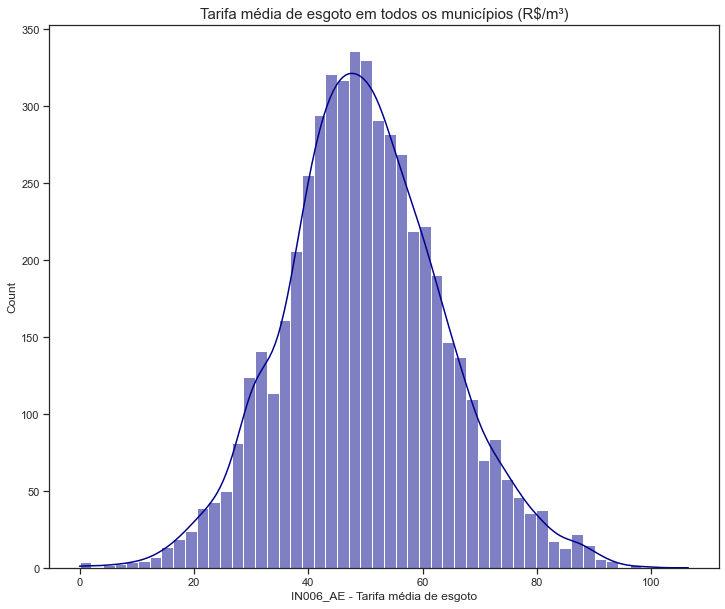

In [49]:
average_sewage_tariffall_cities(data)

#

# Qual é a média do índice de atendimento urbano de esgoto referido aos municípios atendidos com água e qual sua distribuição?

18.54%


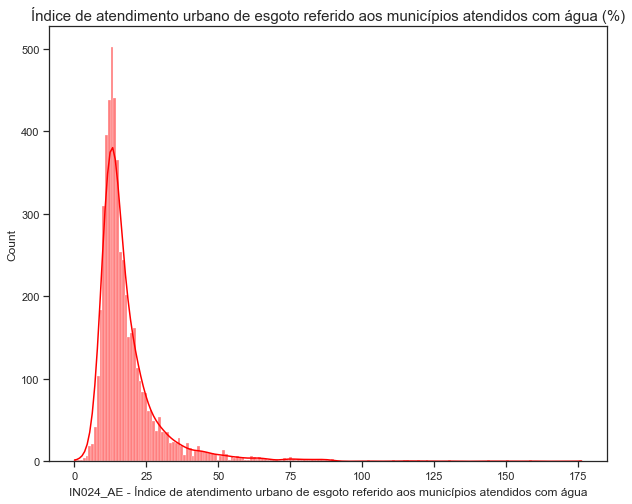

In [50]:
sewage_service(data)

#

# Analisando com aspecto da função log

In [ ]:
sewage_service_log(data)

#

#  Qual é o consumo médio de água per capita por estado?


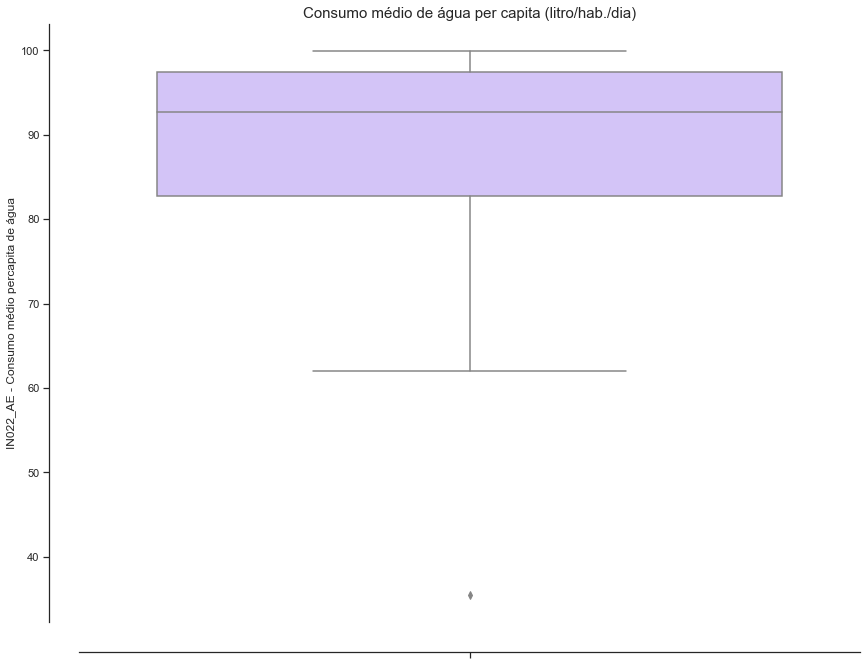

In [ ]:
average_water_consumption_state(data)

#

# Quais são as 10 cidades com menor consumo de água per capita?

In [ ]:
d = data.dropna()
d = d.sort_values(by = 'IN022_AE - Consumo médio percapita de água')
d[['Município', 'Estado', 'IN022_AE - Consumo médio percapita de água']].head(10).reset_index(drop = True)

,Município,Estado,IN022_AE - Consumo médio percapita de água
0,Paulino Neves,MA,6.10
1,Buriticupu,MA,8.70
2,Itaituba,PA,11.70
3,Coelho Neto,MA,13.70
4,Breu Branco,PA,13.70
5,Novo Repartimento,PA,14.60
6,Capanema,PA,17.30
7,Tailândia,PA,17.80
8,Itupiranga,PA,18.50
9,Porto Velho,RO,37.00


De acordo com a Organização das Nações Unidas, cada pessoa necessita de 3,3 mil litros de água por mês (cerca de 110 litros de água por dia para atender as necessidades de consumo e higiene)

#

# Quais são os 10 estados que concentram a maior porção de menor consumo médio de água per capita?

In [ ]:
states_water_minimum_supply = d[['Município', 'Estado']][:10].reset_index(drop = True)
sts = states_water_minimum_supply.groupby('Estado').count().reset_index()
print(sts)
print('\n E tomando uma porção maior = ')

print(sts[sts['Município'] == sts['Município'].max()].reset_index(drop = True))
print('Representando: ', str(round((sts['Município'].max()/sum(sts['Município']))*100, 2)) + '%')

  Estado  Município
0     MA          3
1     PA          6
2     RO          1

 E tomando uma porção maior = 
  Estado  Município
0     PA          6
Representando:  60.0%


#

# População total atendida com abastecimento de água (%)

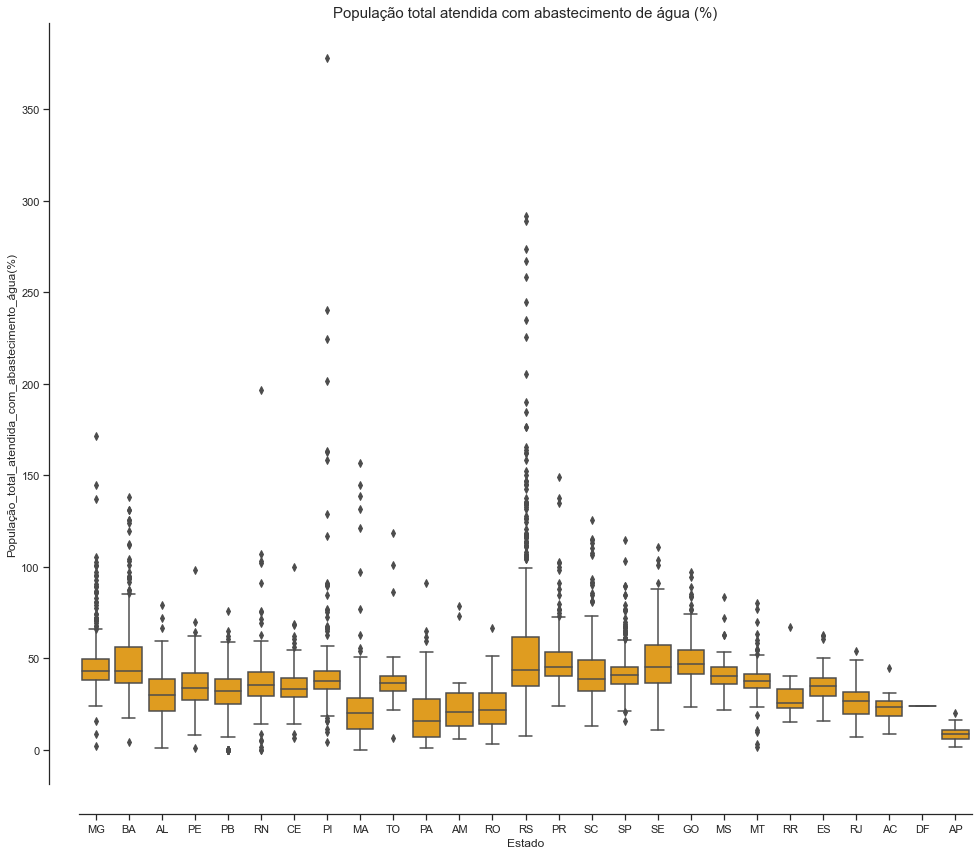

In [ ]:
plot_pop_water_supply(data)

Observando-se o gráfico acima, a maior proporção de cidades atendidas com abastecimento de água ficam localizadas no Rio Grande do Sul

#

# Médias municipal e nacional de população total atendida com abastecimento de água

In [ ]:
data_plot = data.loc[:, ['Município', 'Estado', 'AG001 - População total atendida com abastecimento de água',
                        'IN006_AE - Tarifa média de esgoto',
                        'IN022_AE - Consumo médio percapita de água',
                        'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água',
                        'IN051_AE - Índice de perdas por ligação',
                        'IN052_AE - Índice de consumo de água',
                        'AG026 - População urbana atendida com abastecimento de água',
                        'POP_TOT - População total do município (Fonte: IBGE):', 'População_total_atendida_com_abastecimento_água(%)']]


data_plot.dropna(inplace=True)

#

# Média municipal

In [ ]:
print('média municipal: ', data_plot['População_total_atendida_com_abastecimento_água(%)'].mean())

média municipal:  42.48234558757122


#

# Média nacinal

In [ ]:
# média nacinal
print('média nacinal: ', (data_plot['AG001 - População total atendida com abastecimento de água'].sum()/data_plot['POP_TOT - População total do município (Fonte: IBGE):'].sum())*100)

média nacinal:  29.598507962816967


# Qual o índice de perdas por ligação por estado?

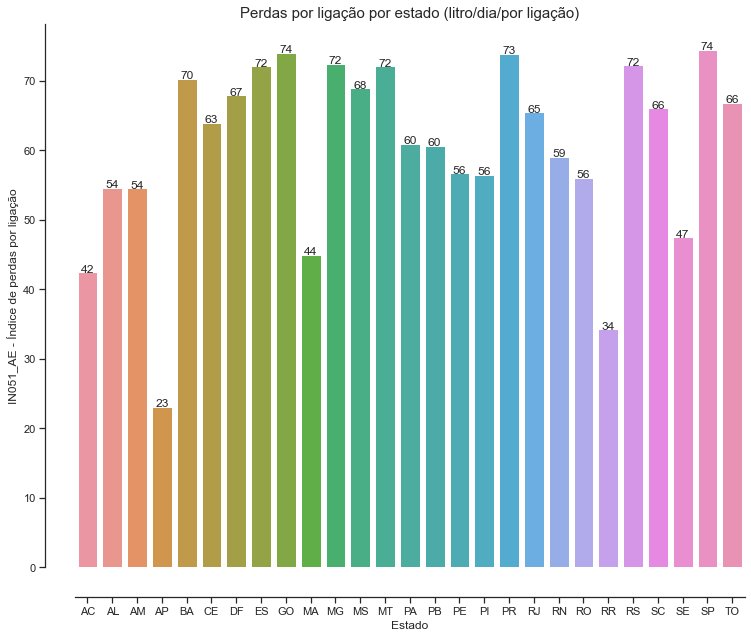

In [ ]:
water_loss_state(data)

Como pode ser visualizado acima, existem muitos estados que possuem a mesma média de perdas por dia, sendo elas caracterizadas por 74 L/dia/por ligação e seu desvio padrão: 

In [ ]:
# agrupei as cidades por estado e calculei a média
db = data[['Estado', 'IN051_AE - Índice de perdas por ligação']].groupby('Estado').mean().reset_index()

db['IN051_AE - Índice de perdas por ligação'].std()


12.99100807879296

#

# Consumo de água por estado

AG006: Volume de água produzido
AG010: Volume de água consumido
AG018: Volume de água tratada importado
AG024: Volume de serviço

[AG010/(AG006 + AG018 - AG024)]*100

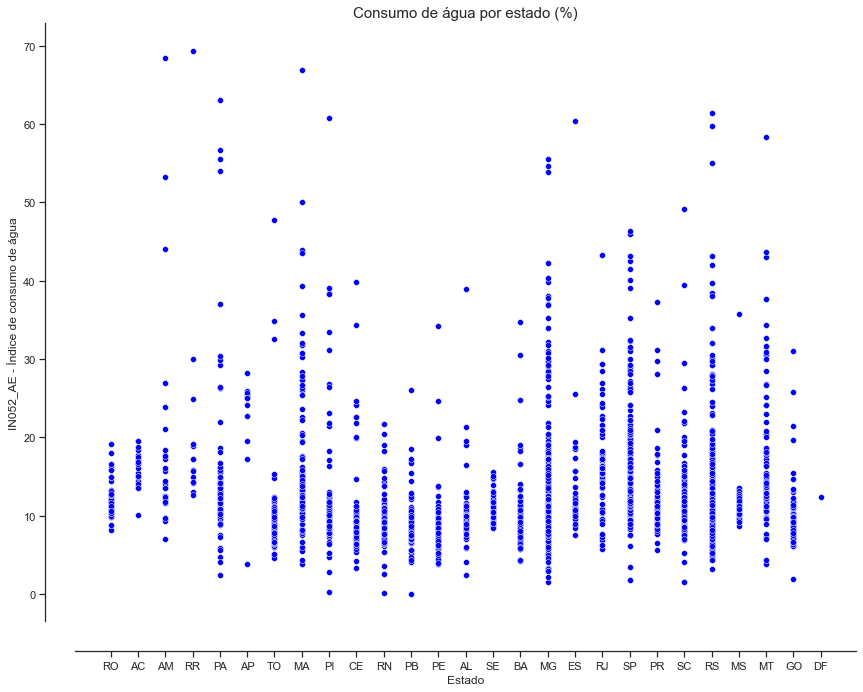

In [ ]:
percentage_water_consumption(data)

#
#
#
#

# Questionamentos DATASUS para óbitos (210 cidades forneceram dados completos)

In [ ]:
deaths = deaths_fn(data)
dx = deaths.dropna()

In [ ]:
dx['Obitos Nenhuma escolaridade'] = dx['Obitos Nenhuma escolaridade'].astype(int)
dx['Obitos 1 a 3 anos escolaridade'] = dx['Obitos 1 a 3 anos escolaridade'].astype(int)
dx['Obitos 4 a 7 anos escolaridade'] = dx['Obitos 4 a 7 anos escolaridade'].astype(int)
dx['Obitos 8 a 11 anos escolaridade'] = dx['Obitos 8 a 11 anos escolaridade'].astype(int)
dx['Obitos 12 anos e mais escolaridade'] = dx['Obitos 12 anos e mais escolaridade'].astype(int)
dx['Obitos Escolaridade Ignorada'] = dx['Obitos Escolaridade Ignorada'].astype(int)
dx['Obitos Totais (com e sem escolaridade)'] = dx['Obitos Totais (com e sem escolaridade)'].astype(float)
dx['Obitos Totais (com e sem escolaridade)'] = dx['Obitos Totais (com e sem escolaridade)'].astype(int)
dx['Obitos Masc'] = dx['Obitos Masc'].astype(int)
dx['Obitos Fem'] = dx['Obitos Fem'].astype(int)
dx['Obitos Sexo Ignorado'] = dx['Obitos Sexo Ignorado'].astype(int)
dx['Total obitos (Masc e Fem)'] = dx['Total obitos (Masc e Fem)'].astype(float)

In [ ]:
women_men_deaths_fn(dx)

A maior porção de óbitos para o ano de 2019 foi masculina representando 53,4%

#

# Óbitos de acordo com a escolaridade

In [ ]:
deaths_from_schooling_fn(dx)

Como pode-se visualizar a maior taxa de óbitos em 2019 foi representada por pessoas com 1 a 3 anos de escolaridade

#

# Correlação linear entre os dados

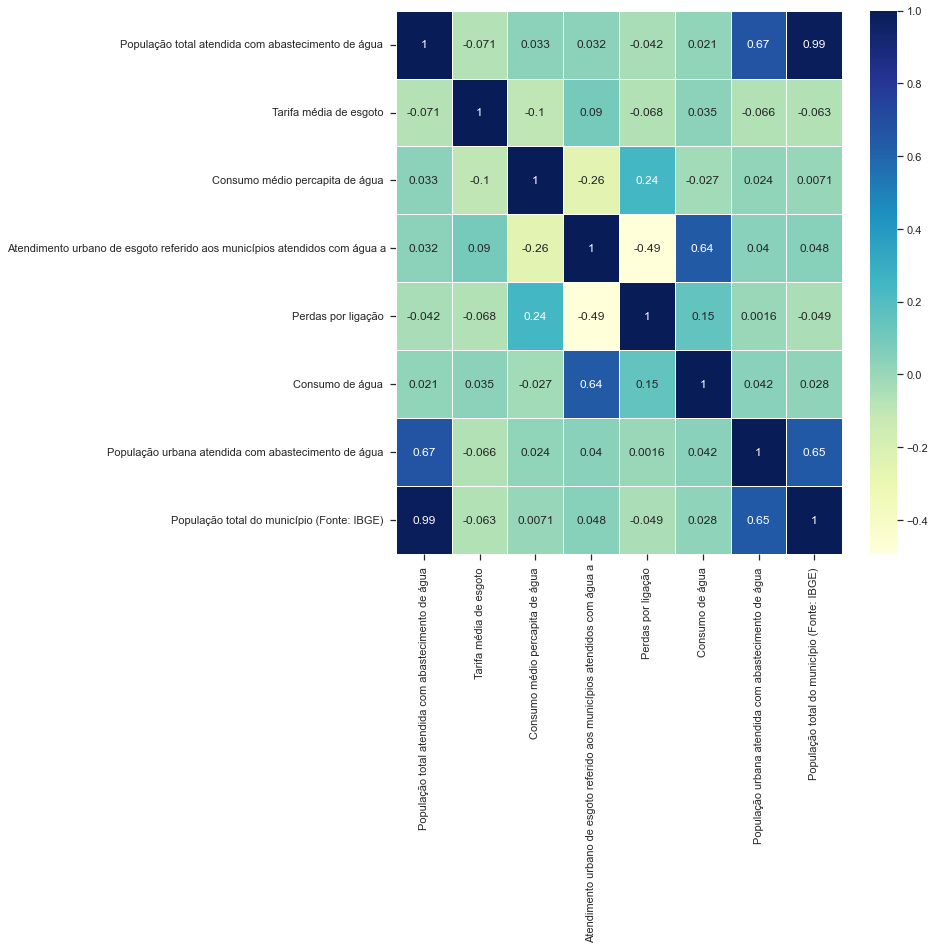

In [ ]:
correlation_of_data_water(data)

# Considerações
Quando a tarifa média de esgoto aumenta, o consumo de água diminui, porém não sabe-se em quantos porcentos.

Quando o atendimento urbano de esgoto referido aos municípios atendidos com água aumenta, a tarifa média de esgoto também aumenta, porém não sabe-se em quantos porcentos.

Quando o atendimento urbano de esgoto referido aos municípios atendidos com água aumenta, o consumo médio de água per capita diminui.

Quando o atendimento urbano de esgoto referido aos municípios atendidos com água aumenta, as perdas por ligação diminuem, mas não sabe-se quantos porcentos.

Perdas por ligação aumenta, quando o consumo médio per capita aumenta também.

Quando o consumo de água aumenta, as perdas também aumentam.

#

# Correlação não linear entre os dados

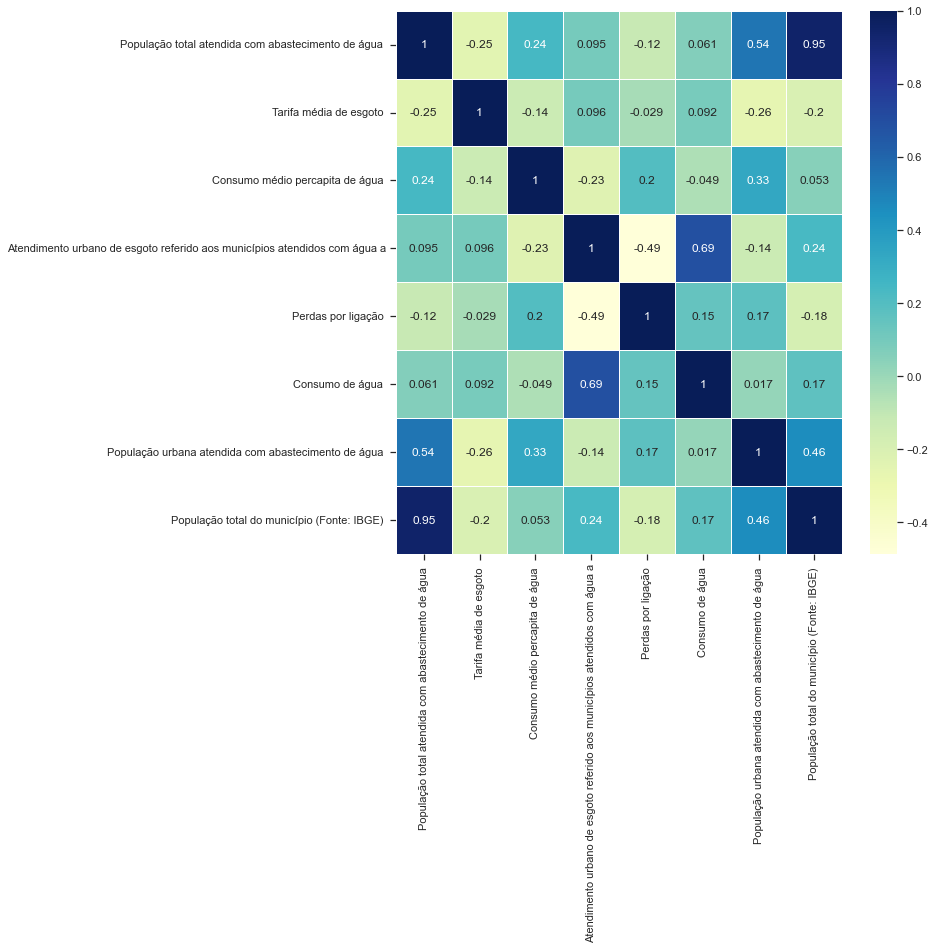

In [ ]:
da = data.dropna()
nonlinear_correlation_snis(da)

#

# Demonstração gráfica da correlação linear

<AxesSubplot:>

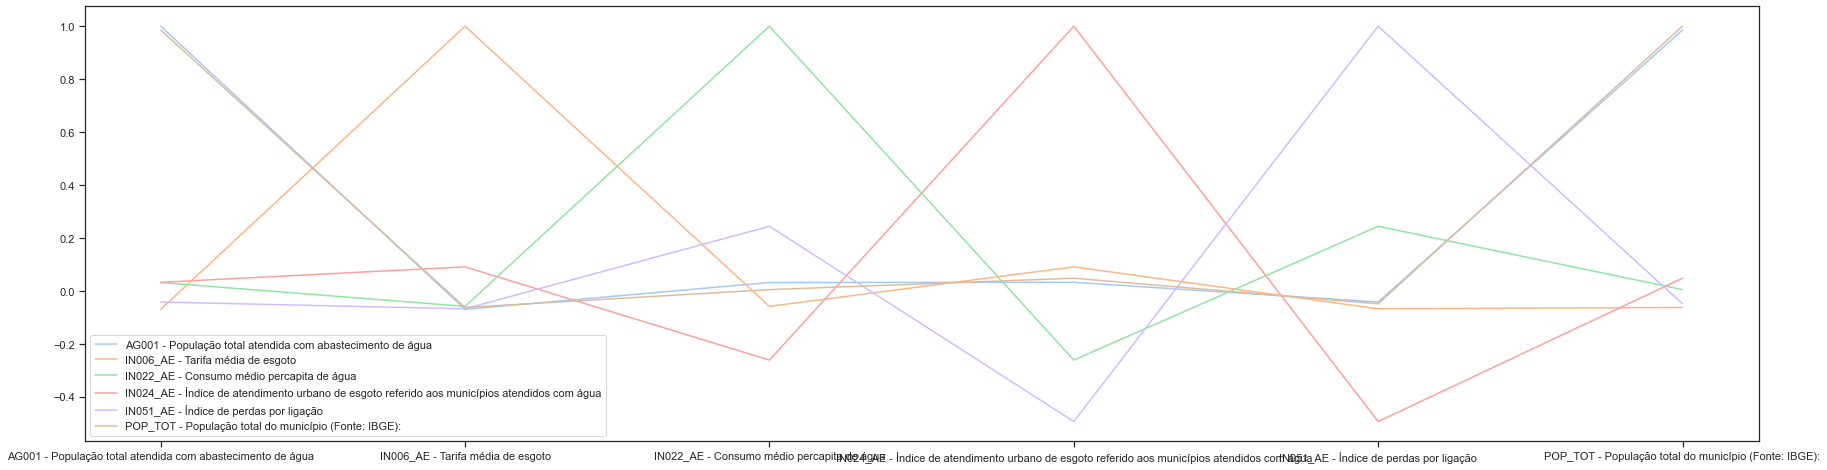

In [ ]:
data_all.corr().plot(figsize = (30, 8))

#

# Demonstração gráfica da correlação não linear

<AxesSubplot:>

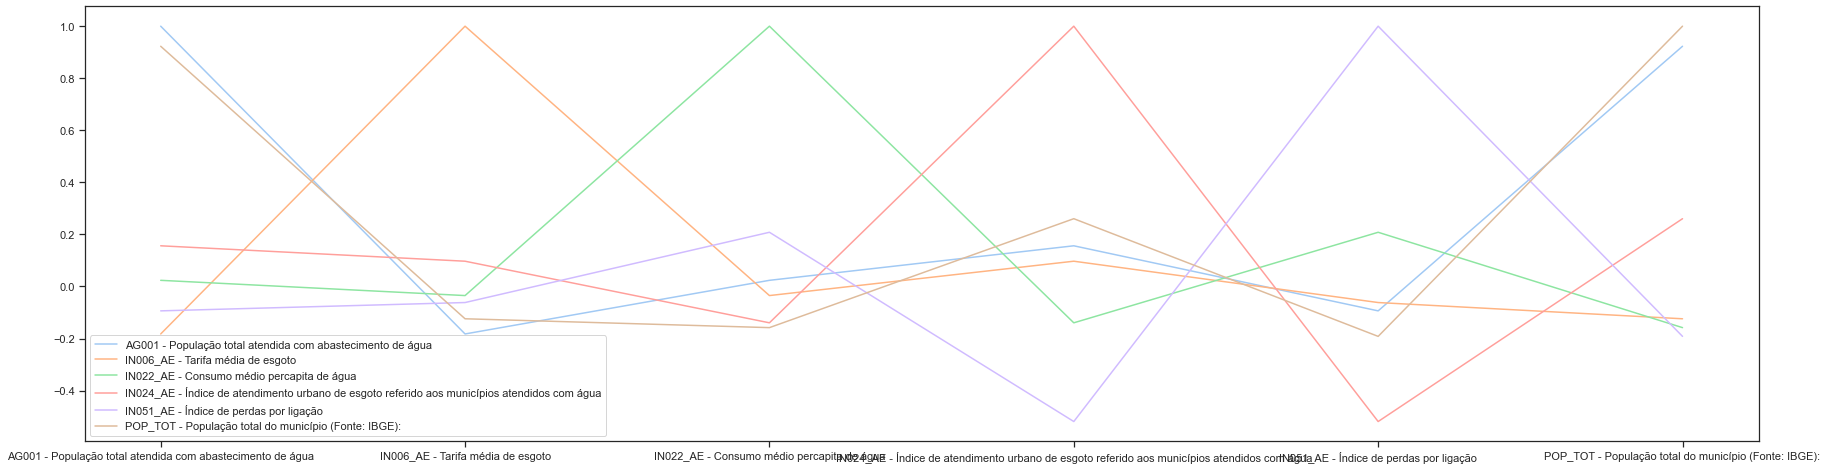

In [ ]:
data_all.corr('spearman').plot(figsize = (30, 8))

#

# DATASUS

#

# Qual os 5 estados que mais forneceram dados sobre óbitos em 2019?

In [ ]:
dx_group = dx.groupby('Estado').count().reset_index()
dx_group = dx_group.sort_values('Município')
dx_group = dx_group[::-1]
dx_group.loc[:10, ['Estado', 'Obitos Nenhuma escolaridade',
       'Obitos 1 a 3 anos escolaridade', 'Obitos 4 a 7 anos escolaridade',
       'Obitos 8 a 11 anos escolaridade', 'Obitos 12 anos e mais escolaridade',
       'Obitos Escolaridade Ignorada',
       'Obitos Totais (com e sem escolaridade)', 'Obitos Masc', 'Obitos Fem',
       'Obitos Sexo Ignorado', 'Total obitos (Masc e Fem)']].reset_index(drop = True)

,Estado,Obitos Nenhuma escolaridade,Obitos 1 a 3 anos escolaridade,Obitos 4 a 7 anos escolaridade,Obitos 8 a 11 anos escolaridade,Obitos 12 anos e mais escolaridade,Obitos Escolaridade Ignorada,Obitos Totais (com e sem escolaridade),Obitos Masc,Obitos Fem,Obitos Sexo Ignorado,Total obitos (Masc e Fem)
0,SP,38,38,38,38,38,38,38,38,38,38,38
1,RJ,25,25,25,25,25,25,25,25,25,25,25
2,PA,21,21,21,21,21,21,21,21,21,21,21
3,BA,16,16,16,16,16,16,16,16,16,16,16
4,PR,12,12,12,12,12,12,12,12,12,12,12
5,MG,11,11,11,11,11,11,11,11,11,11,11


#

In [ ]:
data_deaths = dx.loc[:, ['Obitos Escolaridade Ignorada', 'Obitos Nenhuma escolaridade',
                        'Obitos 1 a 3 anos escolaridade', 'Obitos 4 a 7 anos escolaridade',
                        'Obitos 8 a 11 anos escolaridade', 'Obitos 12 anos e mais escolaridade',
                        'Obitos Masc', 'Obitos Fem', 'Obitos Sexo Ignorado']]

#

# Análise de correlação óbitos DATASUS

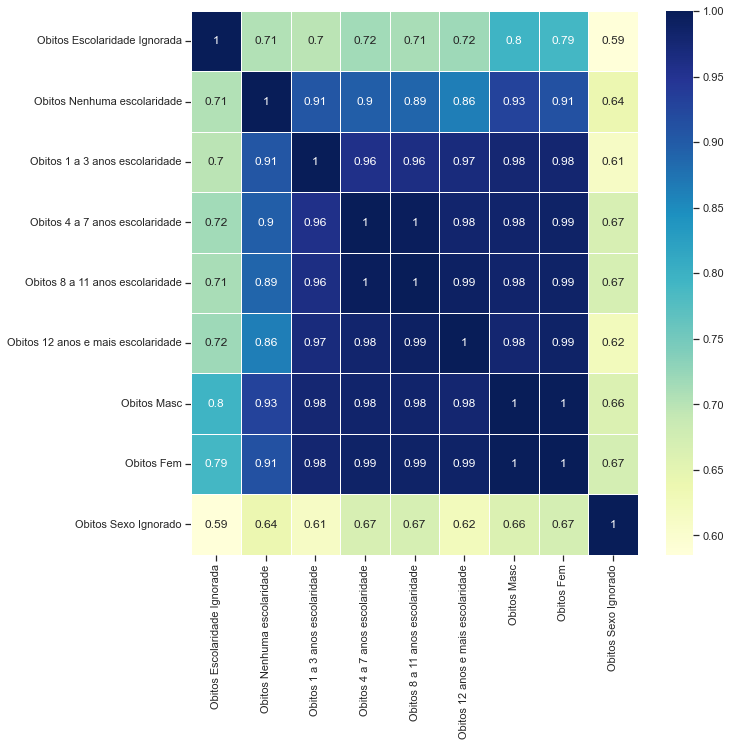

In [ ]:
linear_correlation(data_deaths)

# Considerações acerca de óbitos e escolaridade

Morrem mais homens do que mulheres quando não existe nenhum grau de escolaridade.
Entre 1 e 3 anos de escolaridade, a taxa de óbitos masculino é maior.
Existem mais óbitos femininos do que masculinos, quando a escolaridade varia entre 4 ou mais anos de escolaridade.




#

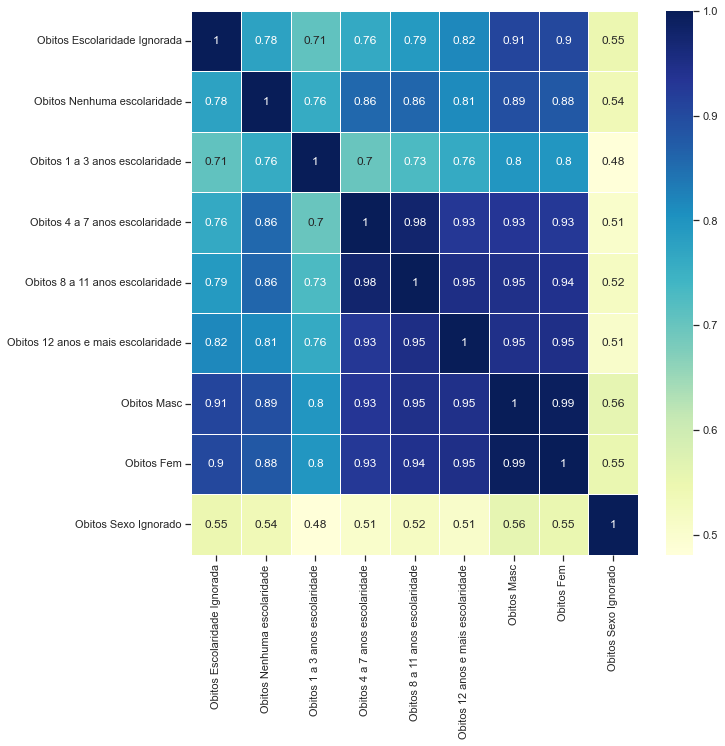

In [ ]:
nonlinear_correlation_datasus(data_deaths)

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data_all) 
prof.to_file(output_file='output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 35.97it/s]
